In [1]:
from clase import cuartas 
from clasificacion import *
import glob 
import os

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.0.4) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


/home/cuba/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
#Todos los archivos de la carpeta del tipo .xml

xml_files = glob.glob('../Archivos/Corales/corales_completo/*.xml')

In [62]:


def extraer_nombre_archivo(ruta):
    nombre_archivo = os.path.basename(ruta)
    return nombre_archivo


df_final = pd.DataFrame()
xml_error = []
for i in xml_files:
    try:
        prueba = cuartas(i)
        df = prueba.extraer_df()
        df_clasificacion = dataframe_clasificacion(df)

        #Nombre del coral

        nombre = extraer_nombre_archivo(i)
        df_clasificacion['Nombre'] =nombre
        df_final = pd.concat([df_final,df_clasificacion])
    except:
        xml_error.append(i)
        continue

print(len(xml_error))

222


In [6]:
df_final.reset_index(drop=True,inplace=True)
df_final

,#,Acordes,Compás,Beat,Duración,Suma_paso (n/4),Suma_cadencial (n/4),Suma_bordadura (n/3),Clasificación,Nombre
0,7,"['A3', 'D4', 'F#4']",1,4.0,1.0,2.0,1.0,0.0,NI,024864Bs.xml
1,31,"['A3', 'D4', 'F#4']",5,4.0,1.0,2.0,1.0,0.0,NI,024864Bs.xml
2,10,"['E3', 'A3', 'C#4', 'E4']",2,2.0,0.5,0.0,1.0,0.0,NI,024864Bs.xml
3,34,"['E3', 'A3', 'C#4', 'E4']",6,2.0,0.5,0.0,1.0,0.0,NI,024864Bs.xml
4,15,"['F#3', 'F#4', 'B4', 'D5']",3,1.5,0.5,2.0,1.0,0.0,NI,024864Bs.xml
...,...,...,...,...,...,...,...,...,...,...
995,11,"['F#3', 'B3', 'A4', 'D5']",2,2.5,0.5,3.0,1.0,0.0,NI,024511B_.xml
996,53,"['E3', 'C#4', 'F#4', 'A4']",10,1.0,1.0,2.0,1.0,0.0,NI,024511B_.xml
997,58,"['E3', 'C#4', 'E4', 'A4']",11,1.5,0.5,2.0,2.0,0.0,NI,024511B_.xml
998,59,"['F#3', 'B3', 'D4', 'B4']",11,2.0,0.5,3.0,1.0,0.0,NI,024511B_.xml


In [7]:
df_final['Clasificación'].value_counts()

Clasificación
NI           674
Paso         313
Cadencial     12
Bordadura      1
Name: count, dtype: int64

<Axes: xlabel='CLasifico(Y/N)'>

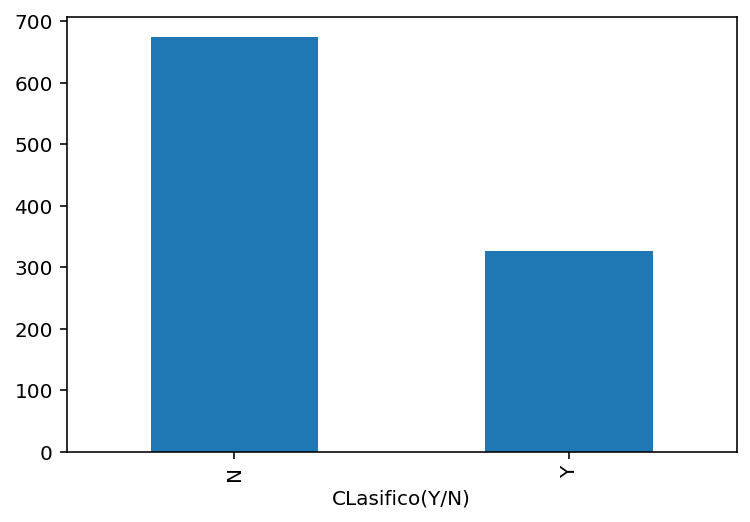

In [63]:
df_final['CLasifico(Y/N)']=df_final['Clasificación'].apply(lambda x: 'Y' if x != 'NI' else 'N')
df_final['CLasifico(Y/N)'].value_counts()

#Histograma de la clasificación

df_final['CLasifico(Y/N)'].value_counts().plot(kind='bar')

<Axes: xlabel='Clasificación'>

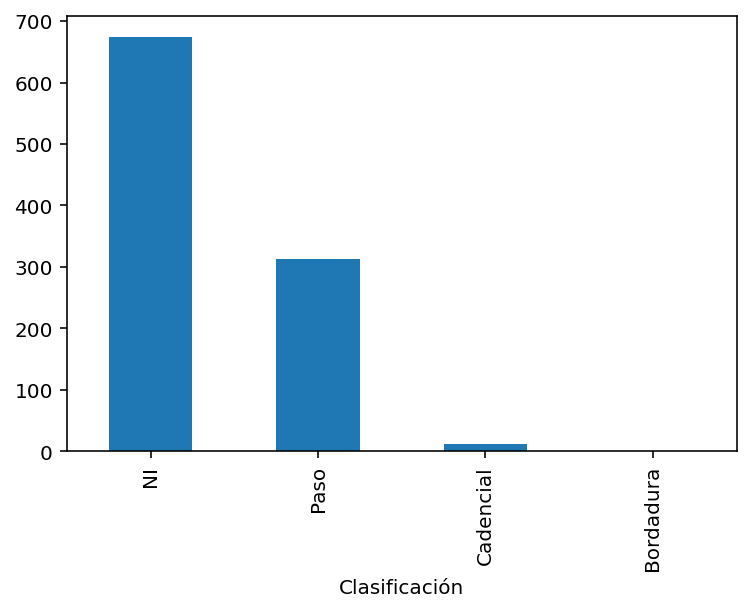

In [64]:
df_final['Clasificación'].value_counts().plot(kind='bar')

<Axes: xlabel='Clasificación'>

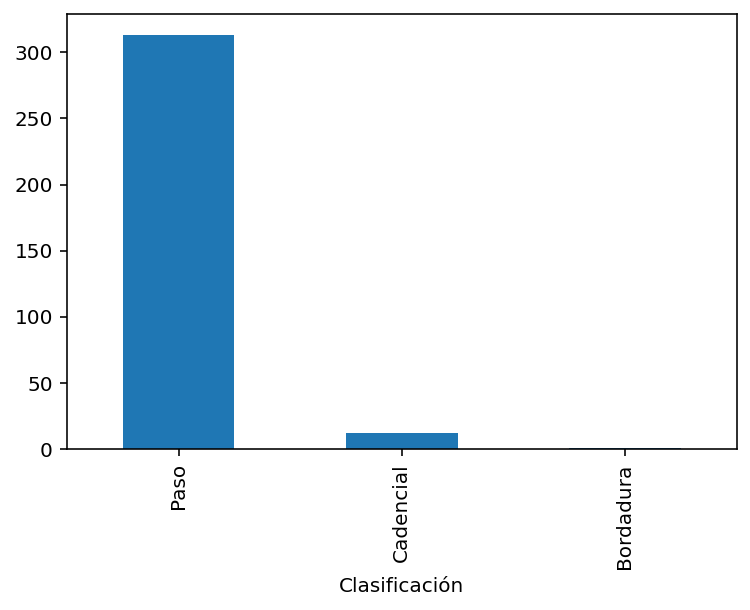

In [65]:
df_final[df_final['Clasificación']!='NI']['Clasificación'].value_counts().plot(kind='bar')

In [66]:
df_final

,#,Acordes,Compás,Beat,Duración,Suma_paso (n/4),Suma_cadencial (n/4),Suma_bordadura (n/3),Clasificación,Nombre,CLasifico(Y/N)
0,7,"['A3', 'D4', 'F#4']",1,4.0,1.0,2.0,1.0,0.0,NI,024864Bs.xml,N
8,31,"['A3', 'D4', 'F#4']",5,4.0,1.0,2.0,1.0,0.0,NI,024864Bs.xml,N
16,10,"['E3', 'A3', 'C#4', 'E4']",2,2.0,0.5,0.0,1.0,0.0,NI,024864Bs.xml,N
24,34,"['E3', 'A3', 'C#4', 'E4']",6,2.0,0.5,0.0,1.0,0.0,NI,024864Bs.xml,N
32,15,"['F#3', 'F#4', 'B4', 'D5']",3,1.5,0.5,2.0,1.0,0.0,NI,024864Bs.xml,N
...,...,...,...,...,...,...,...,...,...,...,...
1,11,"['F#3', 'B3', 'A4', 'D5']",2,2.5,0.5,3.0,1.0,0.0,NI,024511B_.xml,N
2,53,"['E3', 'C#4', 'F#4', 'A4']",10,1.0,1.0,2.0,1.0,0.0,NI,024511B_.xml,N
3,58,"['E3', 'C#4', 'E4', 'A4']",11,1.5,0.5,2.0,2.0,0.0,NI,024511B_.xml,N
4,59,"['F#3', 'B3', 'D4', 'B4']",11,2.0,0.5,3.0,1.0,0.0,NI,024511B_.xml,N


In [67]:
df_final

,#,Acordes,Compás,Beat,Duración,Suma_paso (n/4),Suma_cadencial (n/4),Suma_bordadura (n/3),Clasificación,Nombre,CLasifico(Y/N)
0,7,"['A3', 'D4', 'F#4']",1,4.0,1.0,2.0,1.0,0.0,NI,024864Bs.xml,N
8,31,"['A3', 'D4', 'F#4']",5,4.0,1.0,2.0,1.0,0.0,NI,024864Bs.xml,N
16,10,"['E3', 'A3', 'C#4', 'E4']",2,2.0,0.5,0.0,1.0,0.0,NI,024864Bs.xml,N
24,34,"['E3', 'A3', 'C#4', 'E4']",6,2.0,0.5,0.0,1.0,0.0,NI,024864Bs.xml,N
32,15,"['F#3', 'F#4', 'B4', 'D5']",3,1.5,0.5,2.0,1.0,0.0,NI,024864Bs.xml,N
...,...,...,...,...,...,...,...,...,...,...,...
1,11,"['F#3', 'B3', 'A4', 'D5']",2,2.5,0.5,3.0,1.0,0.0,NI,024511B_.xml,N
2,53,"['E3', 'C#4', 'F#4', 'A4']",10,1.0,1.0,2.0,1.0,0.0,NI,024511B_.xml,N
3,58,"['E3', 'C#4', 'E4', 'A4']",11,1.5,0.5,2.0,2.0,0.0,NI,024511B_.xml,N
4,59,"['F#3', 'B3', 'D4', 'B4']",11,2.0,0.5,3.0,1.0,0.0,NI,024511B_.xml,N


In [104]:
import plotly.express as px


fig = px.density_heatmap(df_final, x="Suma_bordadura (n/3)", y="Suma_cadencial (n/4)",text_auto=True,color_continuous_scale='BLUYL',title='Condiciones Cadencial vs Bordadura')
fig.show()

In [106]:
fig = px.density_heatmap(df_final, x="Suma_paso (n/4)", y="Suma_cadencial (n/4)",text_auto=True,color_continuous_scale='BLUYL',title='Condiciones Cadencial vs Paso')
fig.show()

In [105]:
fig = px.density_heatmap(df_final, x="Suma_paso (n/4)", y="Suma_bordadura (n/3)",text_auto=True,color_continuous_scale='BLUYL',title='Condiciones Paso vs Bordadura')
fig.show()